### This notebook is about inbalances of different languages.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src.utils.helpers import filter_by_country, drop_nans, filter_by_language
from src.data import load_movies


In [2]:
movies = load_movies()


In [3]:
def get_len_of_language(movies, country, language):
    countryMovies = filter_by_country(movies, country=country)
    countryMovies = drop_nans(countryMovies, column="Revenue")
    countryMovies = filter_by_language(countryMovies, language=language)
    return len(countryMovies)

In [4]:
countries_langue = {
    'English': ('United States of America', 'English Language'),
    'French' : ('France', 'French Language'),
    'German': ('Germany', 'German Language'),
    'Spanish': ('Spain', 'Spanish Language'),
    'Chinese': ('Italy', 'Italian Language'),
    'Japanise': ('Japan', 'Japanese Language'),
    'Hindi': ('India', 'Hindi Language')  }

In [5]:
storage = {}
for key in countries_langue:
    country, langue = countries_langue[key]
    len_of_countries = get_len_of_language(movies, country, langue)
    storage[key] = len_of_countries

In [6]:
names = list(storage)
vals = [storage[key] for key in storage]
sorted_ind = np.argsort(vals)

In [7]:
sorted_vals = [vals[ind] for ind in reversed(sorted_ind)]
sorted_names = [names[ind] for ind in reversed(sorted_ind)]

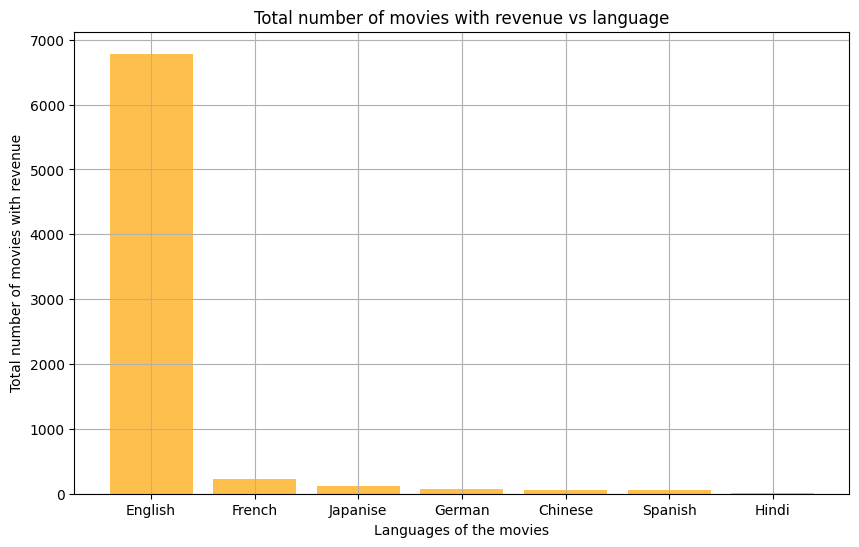

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(sorted_names, sorted_vals, alpha=0.7, color="orange")
plt.title("Total number of movies with revenue vs language")
plt.xlabel("Languages of the movies")
plt.ylabel("Total number of movies with revenue")
plt.grid(True)
plt.show()

Our first idea was to analyse data of movies based on their language and country of origin. However, data about revenue is tiny in all languages, except English. That is why, we have decided to work with genres, rather than with languages of the movies.